# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/installation.md) before you start.
Note: This is an older object detection jupyter notebook, and has been slightly by E. Goodman.

# Imports

In [1]:
pip install tensorflow==1.14.0

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import os #miscellaneous operating system interfaces
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() #doing this fixes certain gfile issues
import zipfile
import tensorflow.io as tf_io
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

## Env setup

In [7]:
# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Object detection imports
Here are the imports from the object detection module.

In [8]:
from utils import label_map_util

from utils import visualization_utils as vis_util

ModuleNotFoundError: No module named 'utils'

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [156]:
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v2_coco_2018_03_29'
MODEL_FILE = MODEL_NAME + '.tar.gz'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = 'C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/trained-inference-graphs/other_inference_graph.pb' #this was a model I got online, when I stumbled upon a dude that also made a racccon classifier
#PATH_TO_CKPT = 'C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/trained-inference-graphs/output_inference_graph_v1.pb/frozen_inference_graph.pb' #this is the second model I trained, and was successful!

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/annotations/label_map.pbtxt' #this label maps, for now, only has raccoons in it!

NUM_CLASSES = 1

## Download Model

There used to be code here, but I would just download it manually and unzip with WinZip.

## Load a (frozen) Tensorflow model into memory

In [157]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [158]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [159]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/181.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/182.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/183.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/184.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/185.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/186.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/187.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/188.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/189.jpg
C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspa

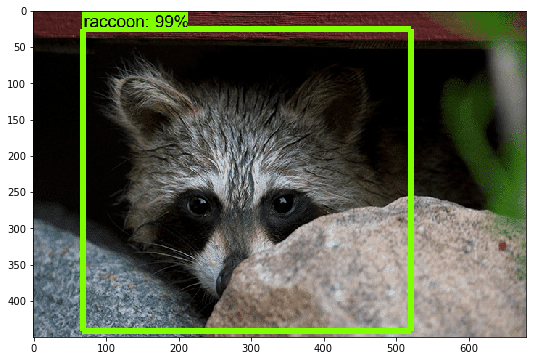

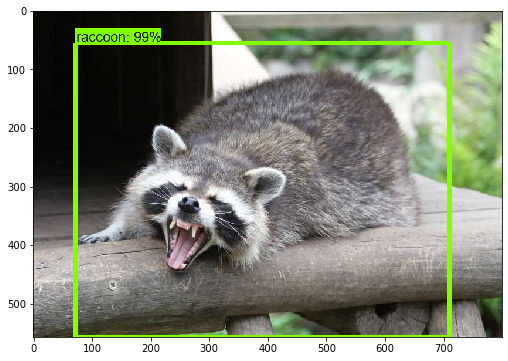

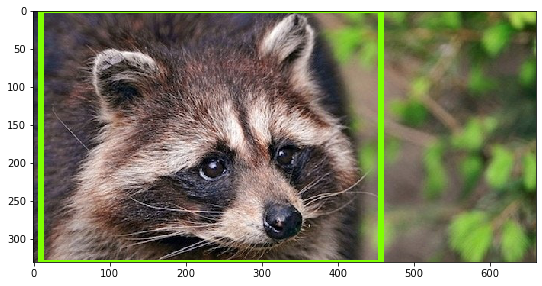

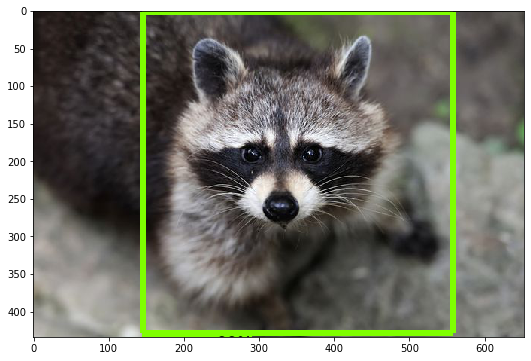

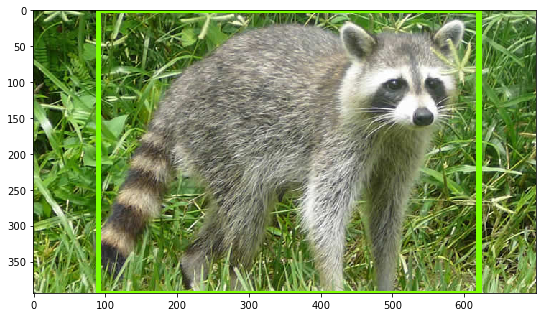

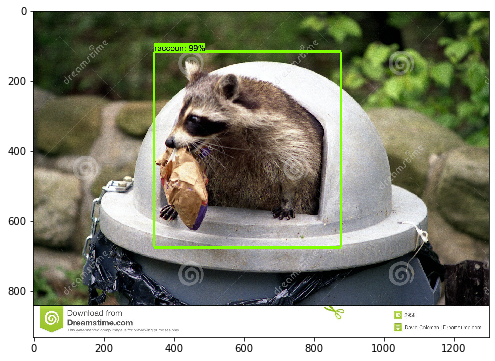

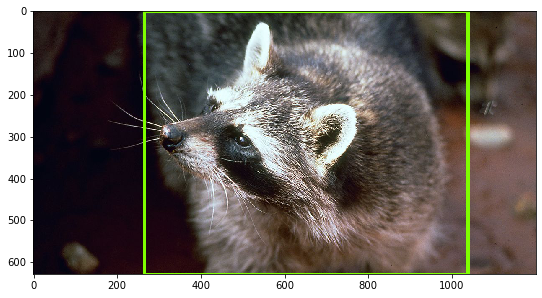

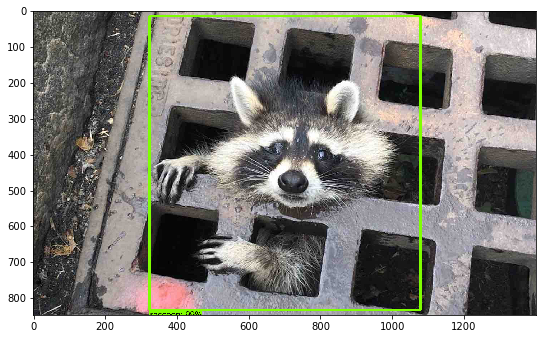

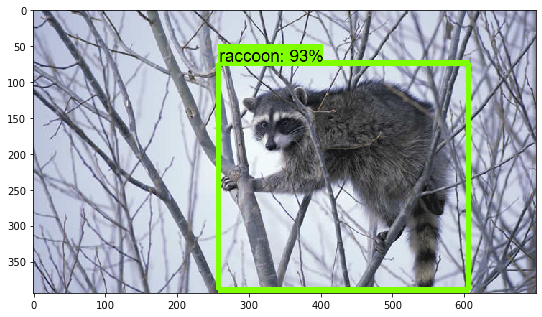

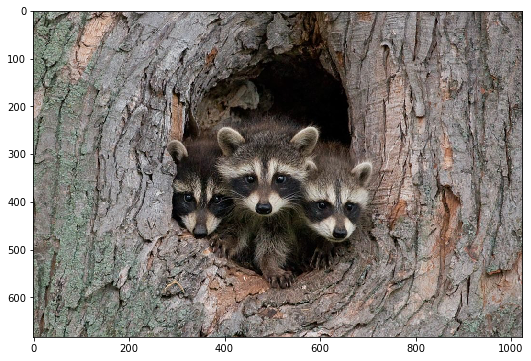

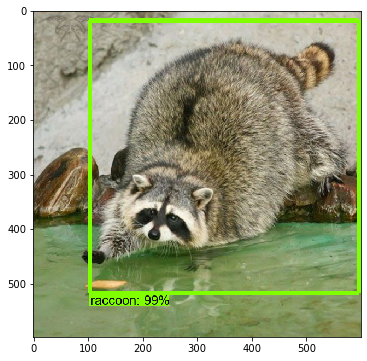

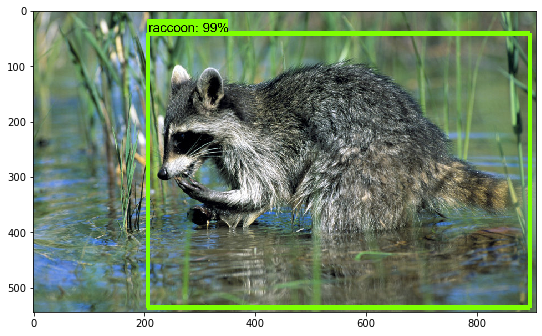

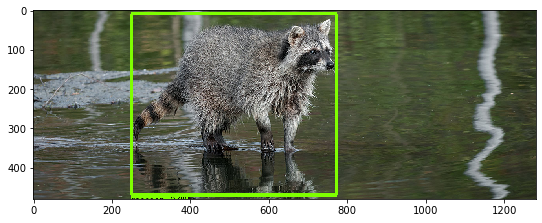

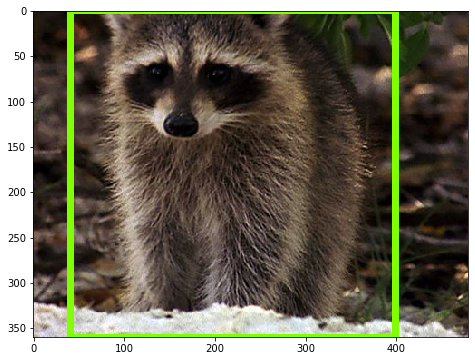

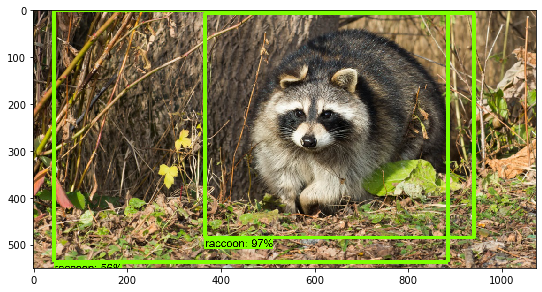

In [160]:
PATH_TO_TEST_IMAGES_DIR = 'C:/Users/egood/Anaconda3/Lib/site-packages/tensorflow/workingspace/training_demo/untouched_test/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpg'.format(i)) for i in range(181, 196) ]

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            print(image_path)
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            plt.figure(figsize=(9, 6))
            plt.imshow(image_np)
            #print('Scores', scores)
            #print('Num_detections', num_detections)